# KNN classifier to recognize single character

In [1]:
import time

import librosa
import librosa.display

from dtw import dtw
from scipy.spatial.distance import cdist

import numpy 

import IPython.display as ipd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
y1, sr1 = librosa.load('./sounds/10.wav') # y1 audio time series, sr sampling rate
y2, sr2 = librosa.load('./sounds/78.wav')

In [3]:
x, sr = librosa.load('./sounds/10.wav')
ipd.Audio(x, rate=sr)

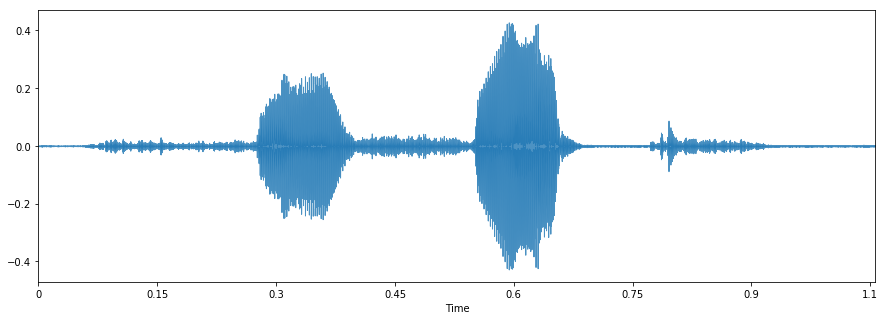

In [4]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8) # time domain 

## MFCC feature sequence 

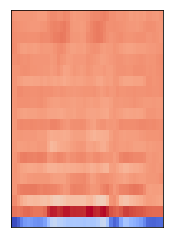

In [5]:
import matplotlib.pyplot as plt
import librosa.display 
%matplotlib inline

plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, S=None, n_mfcc=20, dct_type=2, norm='ortho')
# (input time signal, sampling rate, S: log-MFCC, number of MFCC filters, DCT type )
librosa.display.specshow(mfcc1)

## train sample

In [6]:
y1, sr1 = librosa.load('./train/fcmc0-a1-t.wav')
y2, sr2 = librosa.load('./train/fcmc0-b1-t.wav')

ipd.Audio(y1, rate=sr1)

In [7]:
ipd.Audio(y2, rate=sr2)

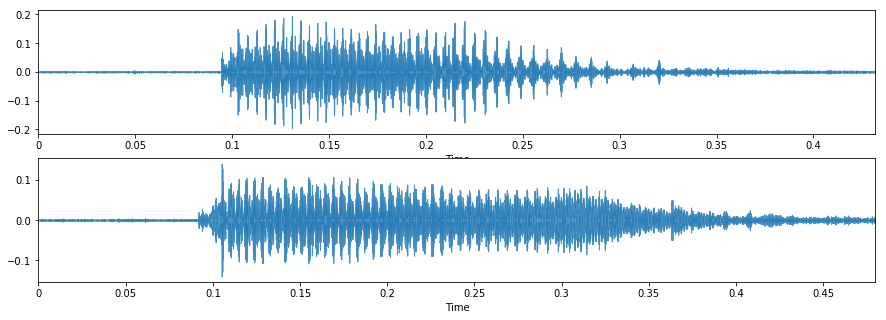

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
librosa.display.waveplot(y1, sr1, alpha=0.8)

plt.subplot(2, 1, 2)
librosa.display.waveplot(y2, sr2, alpha=0.8)

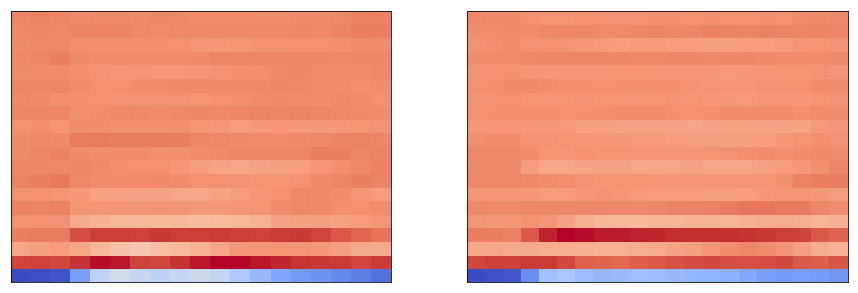

In [9]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(librosa.feature.mfcc(y=y1, sr=sr1))

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2,) 
librosa.display.specshow(librosa.feature.mfcc(y=y2, sr=sr2))

In [10]:
# Calculate 計算兩個樣本音頻 " a  " 和 " b " 之間的DTW  

dist, cost, path, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)   

Normalized distance between the two sounds: 142.10154972076415


## Classification prediction

In [11]:
import os
dirname = "train"
files = [f for f in os.listdir(dirname) if not f.startswith('.')]
print(files)

['fcmc0-a1-t.wav', 'fcmc0-b1-t.wav', 'fews0-a1-t.wav', 'fews0-b1-t.wav', 'fmb0-a1-t.wav', 'fmb0-b1-t.wav', 'fmbd0-a1-t.wav', 'fmbd0-b1-t.wav', 'fme0-a1-t.wav', 'fme0-b1-t.wav', 'frw0-a1-t.wav', 'frw0-b1-t.wav', 'mjp0-a1-t.wav', 'mjp0-b1-t.wav', 'mnjh0-a1-t.wav', 'mnjh0-b1-t.wav', 'mnre0-a1-t.wav', 'mnre0-b1-t.wav', 'mrmh1-a1-t.wav', 'mrmh1-b1-t.wav', 'msa0-a1-t.wav', 'msa0-b1-t.wav', 'mtdw0-a1-t.wav', 'mtdw0-b1-t.wav']


In [12]:
start = time.perf_counter()
min_val = 80
dist_mat = ones((len(files),len(files)))
label_mat = ones((len(files)))
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname + '/' + files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    label_mat[i]= 0 if files[i].split('-')[1][0] == 'a' else 1
    for j in range(len(files)):
        y2, sr2 = librosa.load(dirname + '/' + files[j])
        mfcc2 = librosa.feature.mfcc(y2, sr2)
        dist, _, _, _ = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
        if dist< min_val:
            dist_mat[i][j] = min_val
        else:dist_mat[i][j] = dist  # [i,j] == [i][j]
        
        

end = time.perf_counter()
print("Time used: {}s".format(end-start))

Time used: 10.400942199999996s


In [13]:
dist_mat[0] # A dict 


array([ 80.        , 142.10154972, 163.81579104, 190.84805475,
       151.75006866, 170.33533078, 136.34113057, 152.9883963 ,
       145.80350276, 195.06497405, 137.76304869, 161.30311766,
       165.15954278, 166.88858757, 175.55891591, 181.37818559,
       142.06259046, 169.2537751 , 147.81040285, 191.74864349,
       152.49595566, 192.98359015, 193.16685327, 200.00220343])

In [14]:
print(len(dist_mat[0]))

24


### return the second largest number

In [15]:
import sys 
  
def print2Smallest(arr): 
    arr = arr.ravel()
    # There should be atleast two elements 
    arr_size = len(arr) 
    if arr_size < 2: 
        print ("Invalid Input")
        return
  
    first = second = float(inf)
    for i in range(0, arr_size): 
  
        # If current element is smaller than first then 
        # update both first and second 
        if arr[i] < first: 
            second = first 
            first = arr[i] 
  
        # If arr[i] is in between first and second then 
        # update second 
        elif (arr[i] < second and arr[i] != first): 
            second = arr[i]; 
  
    if (second == float(inf)): 
        print ("No second smallest element")
    else: 
        print ('The smallest element is',first,'and',
              ' second smallest element is',second )
print2Smallest(dist_mat)

The smallest element is 80.0 and  second smallest element is 83.01841387541398


### Manual dimension reduction to 2

In [16]:
ap = 0
bp = 0
feature = []
dist_2d = []
for i in dist_mat:
    for j,d in enumerate(i):
        if j%2 == 0:
            ap += d
        else: bp += d
    feature = [ap/12.0,bp/12.0]
    dist_2d.append(feature)
    ap, bp=0,0 
dist_2d = np.array(dist_2d, dtype=float)

### Using PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
dist_2d_PCA = pca.fit_transform(dist_mat)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.53369656 0.18506945]
[592.94157989 349.16609774]


In [18]:
from sklearn.neighbors import KNeighborsClassifier

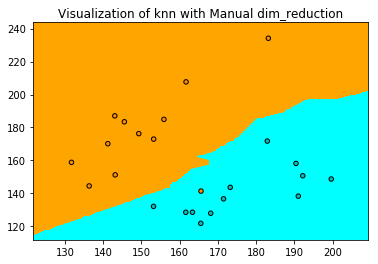

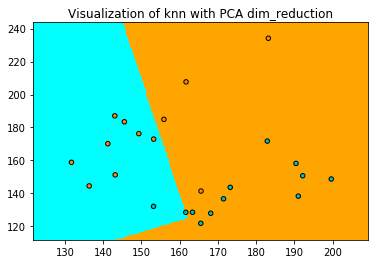

One of A is classified in wrong class, the border is not linear


In [19]:
from matplotlib.colors import ListedColormap

h = 0.5  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])
classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

a = dict(zip(["Manual","PCA"],[dist_2d ,dist_2d_PCA]))
for title in a:


    x_min, x_max = dist_2d[:, 0].min() - 10, dist_2d[:, 0].max() + 10
    y_min, y_max = dist_2d[:, 1].min() - 10, dist_2d[:, 1].max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    
    classifier.fit(a[title], label_mat)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()


    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
    plt.scatter(dist_2d[:, 0], dist_2d[:, 1], c=label_mat[:],  cmap=cmap_bold,
                    edgecolor='k', s=20)
    plt.title("Visualization of knn with {} dim_reduction".format(title))
    
plt.show()
print('One of A is classified in wrong class, the border is not linear')

Performance of manual reduction is better than PCA, because there exist no such relation to reduce, just a correlated distance

In [20]:
label = ['a','b']

## Time for test

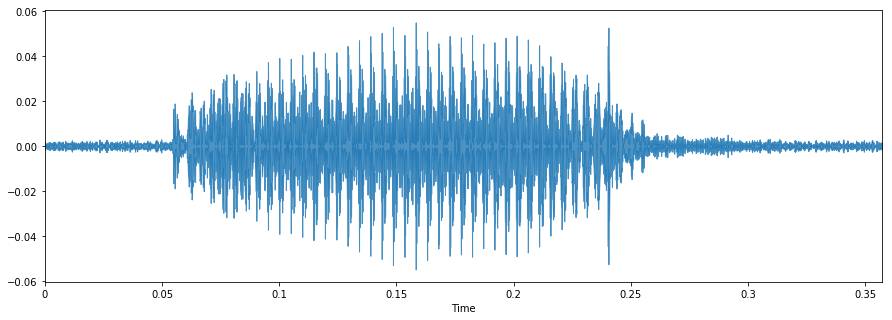

In [21]:
y, sr = librosa.load('./test/farw0-b1-t.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr, alpha=0.8)

In [22]:
ipd.Audio(y, rate=sr)

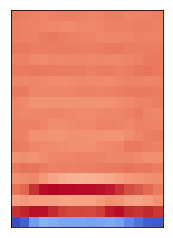

In [23]:
plt.subplot(1, 2, 2) 
mfcc3 = librosa.feature.mfcc(y, sr)
librosa.display.specshow(mfcc3)

In [24]:
distanceTest = []
for i in range(len(files)):
    y1, sr1 = librosa.load(dirname+"/"+files[i])
    mfcc1 = librosa.feature.mfcc(y1, sr1)
    dist, _, _, _ = dtw(mfcc3.T, mfcc1.T, dist=lambda x, y: norm(x - y, ord=1))
    if dist< min_val:
            istanceTest.append(min_val)
            
    else:distanceTest.append(dist)
distanceTest

[170.23604343959263,
 144.89601918813344,
 222.94416548566122,
 168.08401012420654,
 162.2758460998535,
 126.2518793741862,
 256.5378887469952,
 156.42962711415393,
 115.41738500350561,
 112.87605628967285,
 182.0862921738043,
 103.89100725222856,
 196.12760404261147,
 177.09604665395375,
 224.956551361084,
 153.66453365749783,
 200.47317778758514,
 133.32532305595203,
 222.4512570029811,
 199.7415482370477,
 216.13406537030195,
 134.36169136895074,
 307.7836873372396,
 234.82199443470347]

In [25]:
classifier_all = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier_all.fit(dist_mat,label_mat)
pre = classifier_all.predict([distanceTest])[0]

1.0


## Result 

In [26]:
print(pre)

'b'

In [ ]:
label[int(pre)]